In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

type(cancer)

sklearn.utils.Bunch

In [14]:
df = pd.DataFrame(cancer.data, columns = [cancer.feature_names])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
cancer.data.shape

(569, 30)

In [25]:
print(len(cancer.data[cancer.target==1]))

357


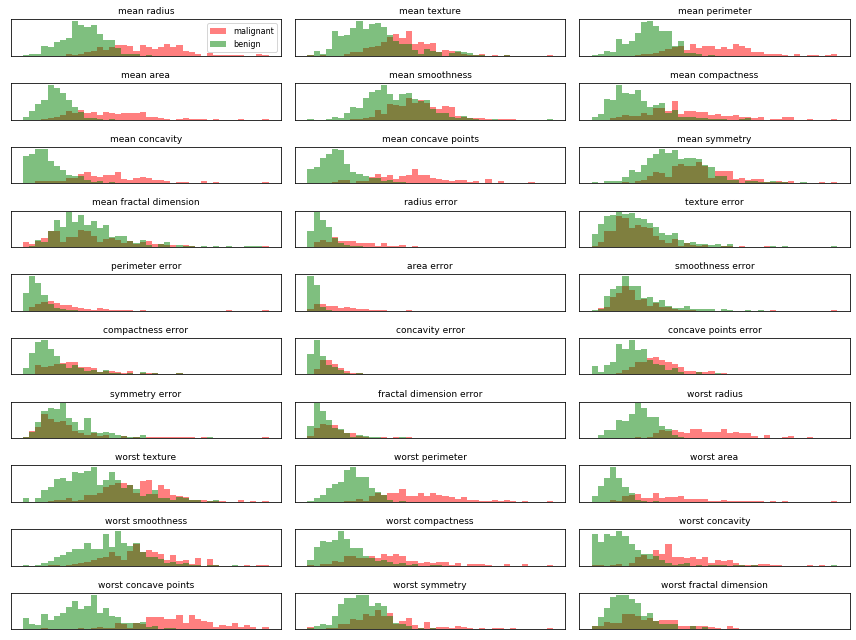

In [40]:
#plotting the distribution of varibles

fig, axes = plt.subplots(10,3, figsize=(12,9)) # 3 columns each containing 10 figures, total 30 features
malignant = cancer.data[cancer.target==0]  #define malignant
benign =  cancer.data[cancer.target==1]  #define benign

ax = axes.ravel() #flat axes with numpy ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=40)
    ax[i].hist(malignant[:,i], bins = bins, color='r', alpha=.5) # red color for malignant class
    ax[i].hist(benign[:,i], bins = bins, color='g', alpha=.5)
    ax[i].set_title(cancer.feature_names[i], fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())
    
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()
plt.show() 

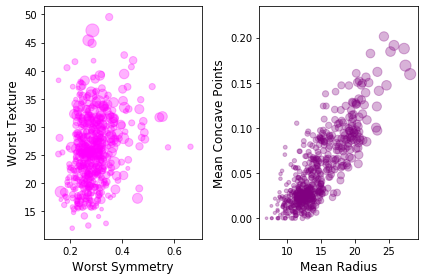

In [41]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)

plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(cancer.data)
X_scaled = sc.transform(cancer.data)


In [44]:
# PCA fro Dimension Reductions

pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [45]:
X_pca.shape #as we can see all the columns has been to 5 PCA

(569, 5)

In [49]:
#Variation covered by the PC Components

ex_variance = np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


[0.52248073 0.2238903  0.11085435 0.07791575 0.06485886]


In [52]:
X_pca

array([[ 9.19283683,  1.94858307, -1.12316618,  3.63373092, -1.19511007],
       [ 2.3878018 , -3.76817174, -0.52929268,  1.11826386,  0.62177496],
       [ 5.73389628, -1.0751738 , -0.5517476 ,  0.91208268, -0.17708588],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, -2.08922702,  1.80999132],
       [10.37479406,  1.67201011, -1.87702933, -2.35603113, -0.03374195],
       [-5.4752433 , -0.67063679,  1.49044306, -2.2991571 , -0.18470322]])

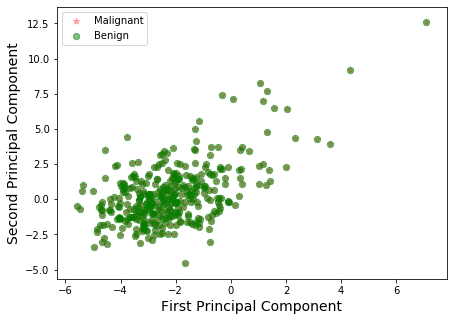

In [60]:
Xax = X_pca[:,0]
Yax = X_pca[:,1]
labels = cancer.target
cdict = {0:'red', 1:'green'}
label = {0:'Malignant', 1:'Benign'}
marker = {0:"*", 1:'o'}
alpha = {0:.3,1:.5}
fig, ax = plt.subplots(figsize = (7,5))
fig.patch.set_facecolor('white')


for l in np.unique(labels):
    ix = np.where(labels==1)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=40, 
              label = label[l], marker=marker[l], alpha=alpha[l])



plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

C:\Users\AKASH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


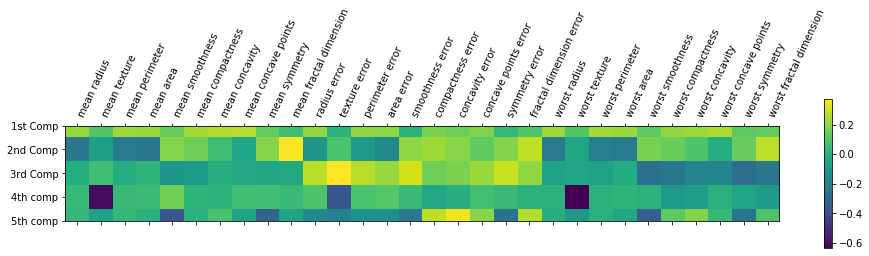

In [63]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp', '4th comp', '5th comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()
